# Importación de módulos

En este caso, se utilizan los mismos módulos que en el archivo *example_msh_file.ipynb*, la única función diferente que se importa es: 

* La función **temperature_gradients_nodes_tri** que calcula los gradientes de temperatura promediados y el flujo de calor en los nodos de elementos triangulares de 3 nodos, usando la ley de Fourier y la conductividad térmica del material.

In [4]:
import meshio
import numpy as np 
from NRoutines.preprocess import assem_files_w_msh
from NRoutines.assembling import DME_heat, assembler_heat, loadasem
from NRoutines.postprocesor import complete_disp, temperature_gradients_nodes_tri, fields_plot

# Cálculo de Temperatura y Gradientes en Elementos Triangulares:
Para el análisis térmico, se realiza un proceso similar anterior, con diferencia que se específica en algunas funciones el tipo de elemento de malla como *triang*

1. Carga de Malla y Condiciones Iniciales: Carga la malla ring.msh, aplica una carga térmica, y configura los nodos, materiales, elementos y cargas.
2. Distribución y Ensamblaje: Calcula la matriz de distribución de grados de libertad (DME), condiciones de frontera (IBC) y el número de ecuaciones (neq). Ensambla la matriz de rigidez global (KG) y el vector de cargas (RHS).
3. Resolución y Desplazamientos: Resuelve el sistema para obtener las temperaturas en los nodos libres (UG), y completa los valores de temperatura en todos los nodos (UC).
4. Gradientes de Temperatura y Flujo: Calcula los gradientes de temperatura (Et) y el flujo de calor (Qt) en los nodos. 

In [5]:
nodes, mats, elements, loads = assem_files_w_msh(r"Files_triang/ring.msh",heat_load=10.0,ele_type="triang")
DME, IBC, neq = DME_heat(nodes, elements)
KG = assembler_heat(elements, mats, nodes, neq, DME, nnodes=3, ele_type="triang")
RHS = loadasem(loads, IBC, neq)
UG = np.linalg.solve(KG, RHS)
UC = complete_disp(IBC, nodes, UG)
Et, Qt = temperature_gradients_nodes_tri(nodes, elements, mats, UC)

Por último, se grafican los resultados obtenidos

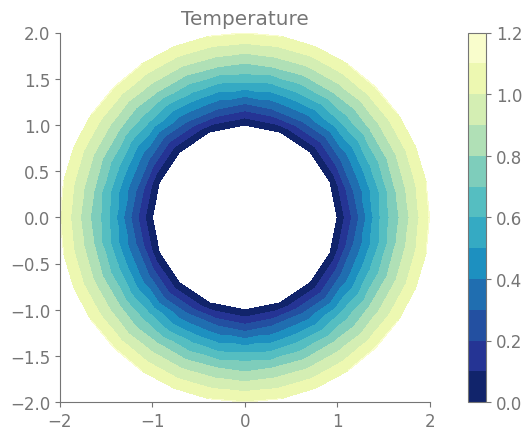

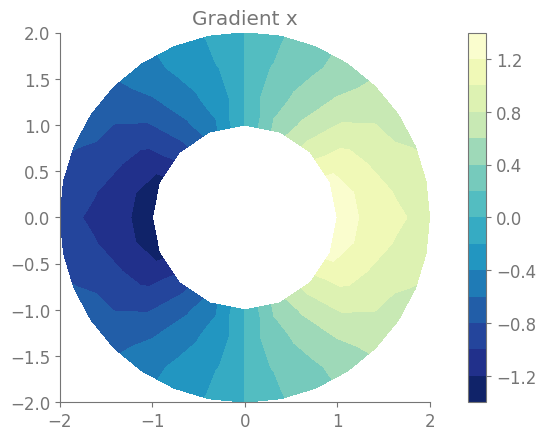

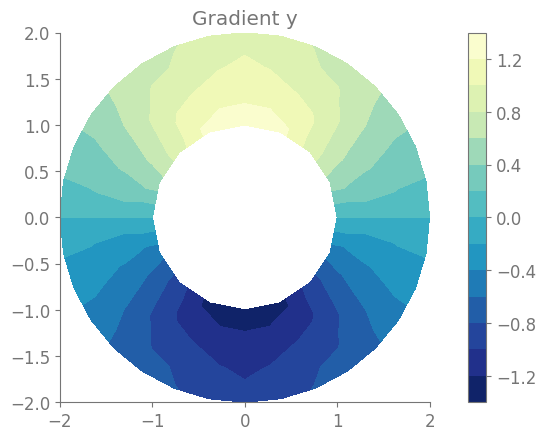

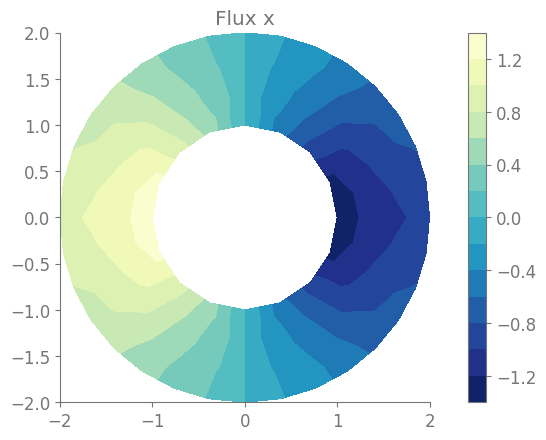

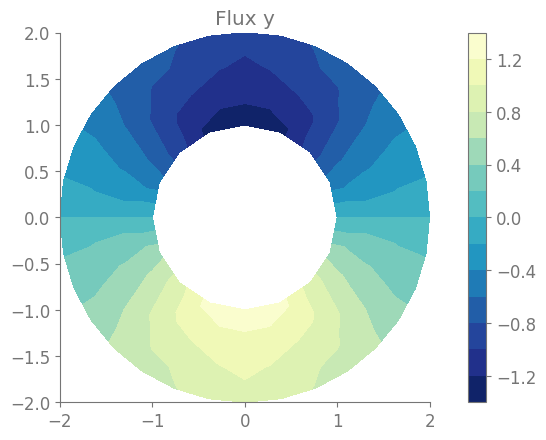

In [6]:
fields_plot(elements, nodes ,UC,ele_type="triang",gradients=Et,fluxes=Qt)